# Geometry #1
Visualize the influence of geology, faults and fractures on the computed karst conduit networks.

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np
import copy

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 50,
    'nz' : 50,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(name='geometry_01', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

In [3]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 1111,
        'mode' : 'A'
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 250]],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[-5, 250]],
        'subdomain'  : 'domain_surface',
    },
}

## The most simple case : no domain delimitations & no geological features 

In [4]:
# Compute simulations
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

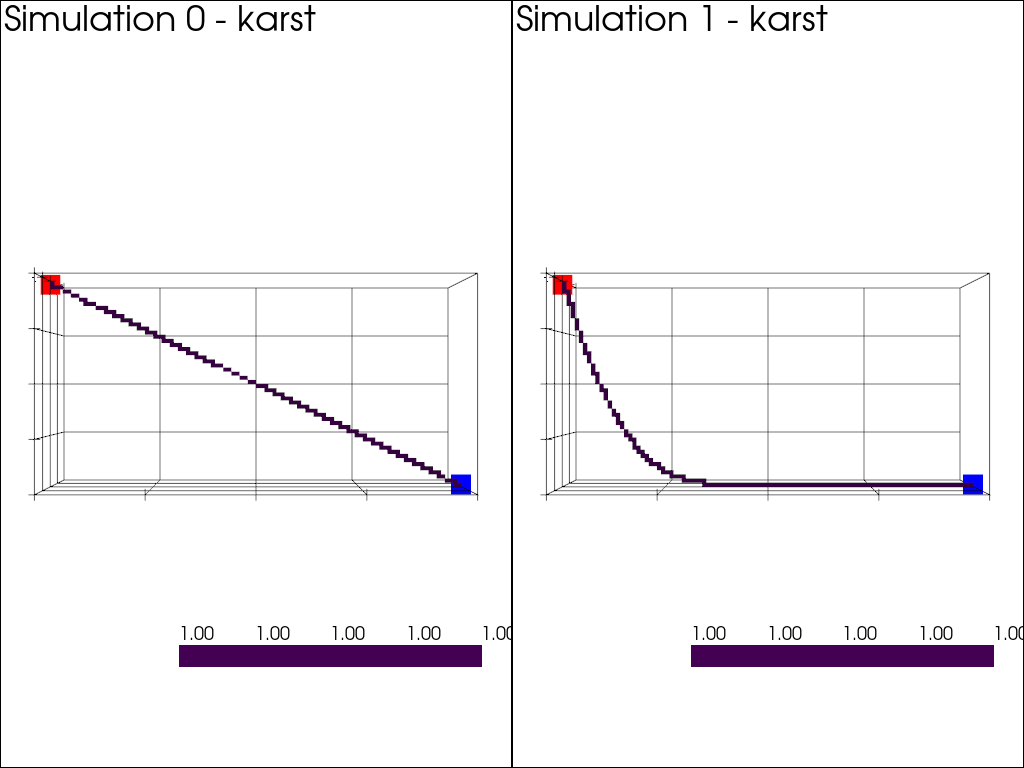

In [5]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(
    simulations=last_simulations,
    features=['karst'],
    settings=settings,
)

## Influence of the faults / bedding

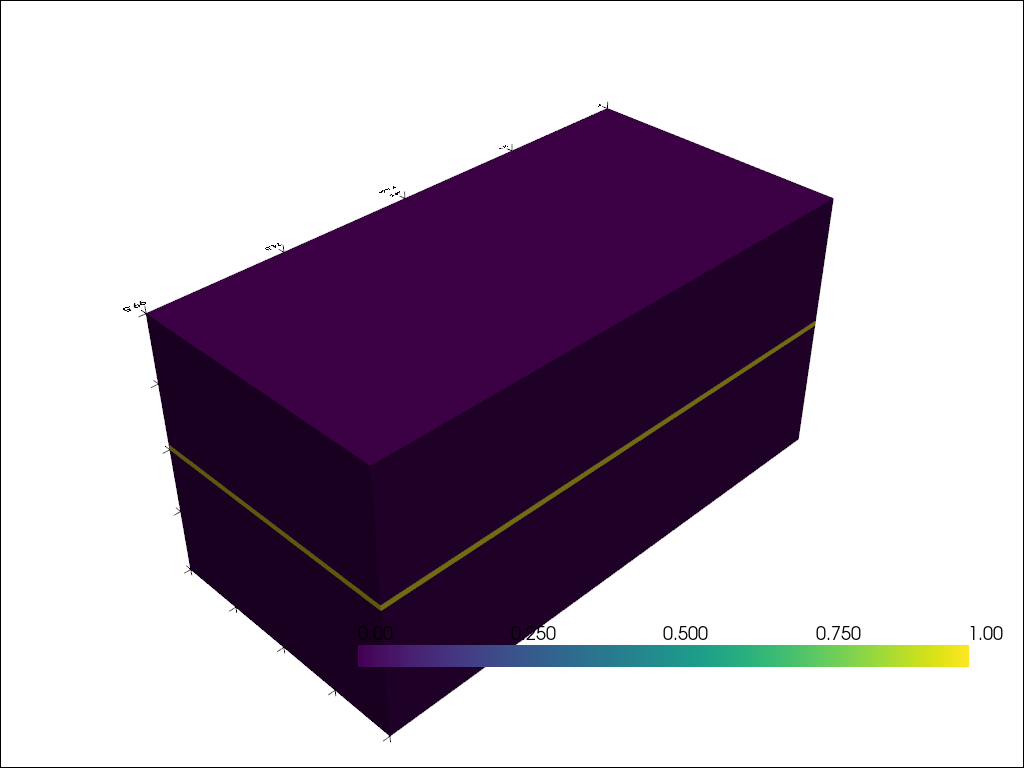

In [6]:
# Construct a horizontal fault
faults = np.full(app.project.grid.shape, 0)
faults[:, :, int(nz/2)] = 1

# Visualize the fault
app.visualizer.pv_plot_array(faults, cpos=[1,1,1])

# Update the model parameters dictionary
new_param = copy.deepcopy(model_parameters)
new_param['faults'] = {'data' : faults}

In [7]:
# Compute new simulations
for algorithm in ['Isotropic3', 'Riemann3']:
    new_param['sks']['algorithm'] = algorithm
    app.model.generate(new_param)

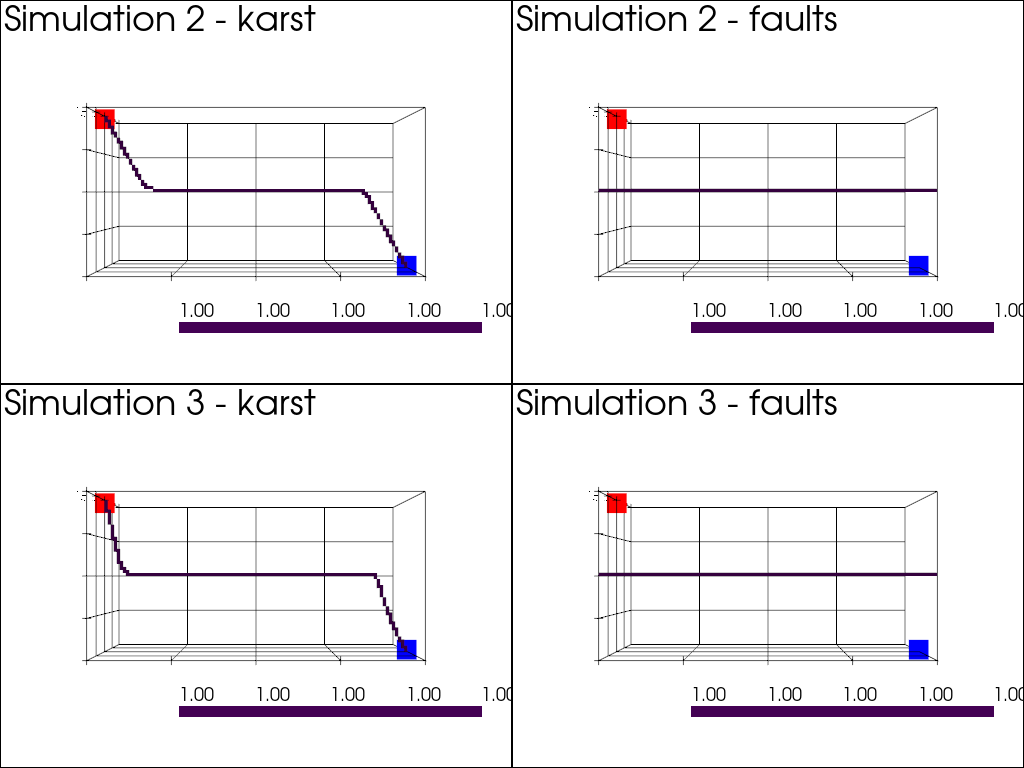

In [8]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(
    simulations=last_simulations,
    features=['karst', 'faults'],
    settings=settings,
)

## Influence of the fracturation

In [9]:
# Declare the fracturation settings
fractures = {
    'seed': 111111,
    'generate': {
        'family_01': {
            'alpha'        : 2,
            'density'      : 0.00005,
            'orientation'  : [90, 120],
            'dip'          : 90,
            'length'       : [300, 500],
        }, 
        'family_02': {
            'alpha'        : 2,
            'density'      : 0.00005,
            'orientation'  : 0,
            'dip'          : [0, 90],
            'length'       : [400,600],
        }
    }
}

# Update the settings
new_param = copy.deepcopy(model_parameters)
new_param['fractures'] = fractures

In [10]:
# Compute new simulations
for algorithm in ['Isotropic3', 'Riemann3']:
    new_param['sks']['algorithm'] = algorithm
    app.model.generate(new_param)

In [11]:
# Access the list of generated fractures
app.model.fractures.fractures

,family_id,x,y,z,radius,orientation,dip,normal
0,1,1085.616879,699.204133,708.114736,226.302985,114.969195,90.000000,"(-0.4221309281017555, -0.9065348749716972, -6...."
1,1,580.889012,332.543086,464.839089,230.738441,101.949688,90.000000,"(-0.20705269035092258, -0.9783297927684943, -6..."
2,1,356.332719,532.351925,696.243942,152.860164,116.143092,90.000000,"(-0.4406144449613087, -0.897696446963804, -6.1..."
3,1,172.467134,-22.855182,-153.865691,192.315086,103.267445,90.000000,"(-0.22949675474698863, -0.9733094264213208, -6..."
4,1,1028.131196,531.745430,-254.287175,159.220691,96.492085,90.000000,"(-0.11306595675047541, -0.9935874845347538, -6..."
...,...,...,...,...,...,...,...,...
67,2,271.546046,689.074839,472.725254,216.367564,0.000000,47.042971,"(0.7318649852901103, -4.481380558217792e-17, -..."
68,2,930.107632,-182.253714,620.177368,280.714941,0.000000,28.194924,"(0.47247268242020196, -2.893060791052321e-17, ..."
69,2,-212.820709,-213.541952,652.756662,253.073117,0.000000,65.585087,"(0.9105761064040493, -5.575670570438893e-17, -..."
70,2,326.762613,138.003454,-68.304914,275.977987,0.000000,87.761368,"(0.999236805757383, -6.118560778805023e-17, -0..."


In [12]:
# Access the list of family fractures
app.model.fractures.families

,name,density,cost
1,family_01,0.00005,0.2
2,family_02,0.00005,0.2


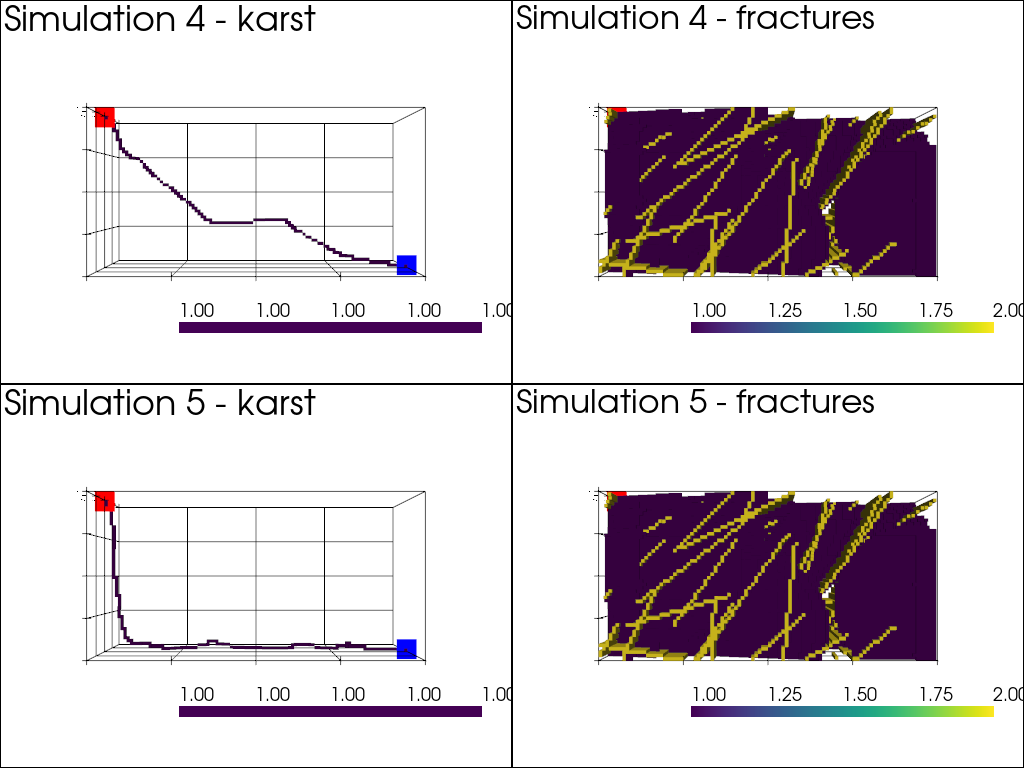

In [13]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(
    simulations=last_simulations,
    features=['karst', 'fractures'],
    settings=settings,
)

## Influence of the geology

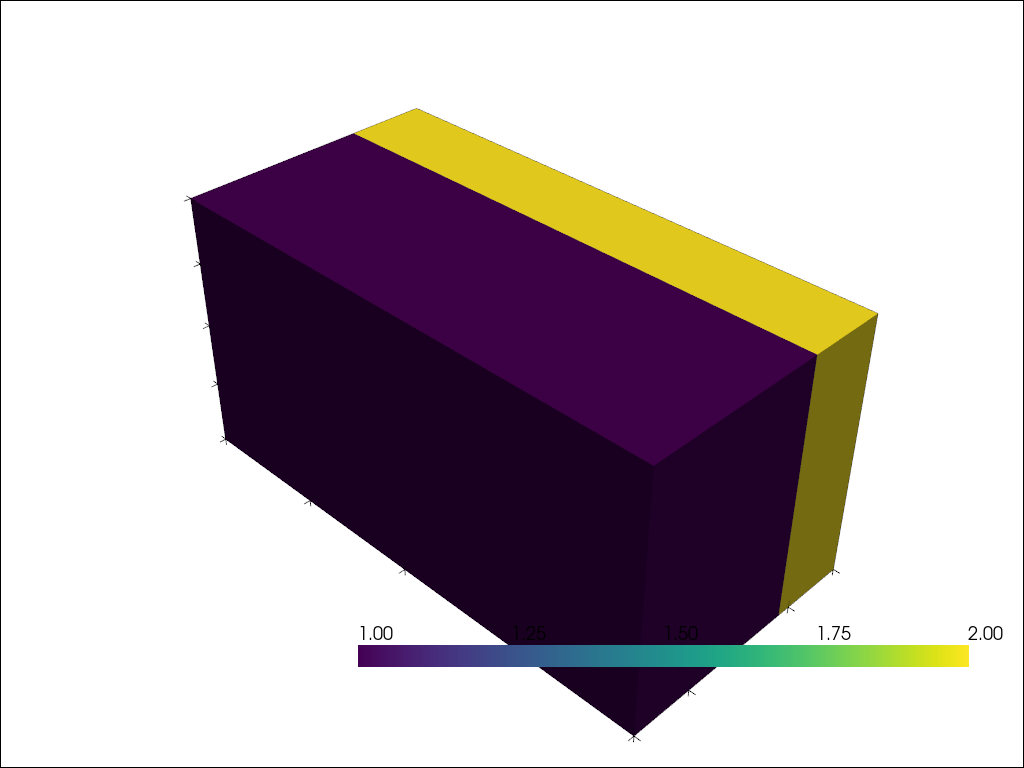

In [14]:
# Construct the geology
geology = np.full(app.model.grid.shape, 1)
geology[:, 35:50, :] = 2

# Visualize the geology
app.visualizer.pv_plot_array(geology, cpos=[1,-1,1])

# Update the parameters
new_param = copy.deepcopy(model_parameters)
new_param['geology'] = {
    'data' : geology,
    'costs' : {
        1: 0.6,
        2: 0.4
    }
}

In [15]:
# Compute new simulations
for algorithm in ['Isotropic3', 'Riemann3']:
    new_param['sks']['algorithm'] = algorithm
    app.model.generate(new_param)

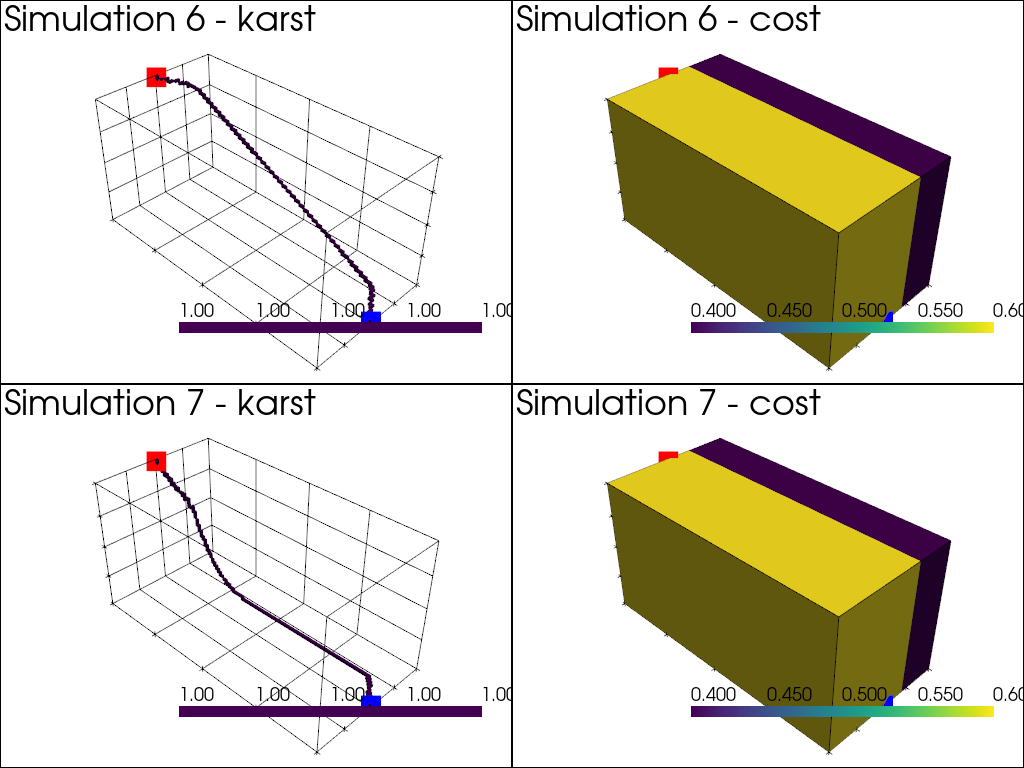

In [16]:
# Visualize the results
settings = {
    'mask_values': [0],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
}
last_simulations = app.project.get_last_simulations(2)
app.visualizer.pv_show(
    simulations=last_simulations,
    features=['karst', 'cost'],
    settings=settings,
    cpos=[1, -1, 1],
)